In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Simple Linear Regression

In [ ]:
def rumus biasa
y = mx + c

y = ?

# Multiple Linear Regression

In [15]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\jupyter\visualisasi\dataset\Admission_Predict.csv')
pd.set_option('display.max_columns', None)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [16]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [17]:
data = data.drop('Serial No.', axis = 1)

In [19]:
# memisahkan variabel independedn dan dependen
x = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [22]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [23]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit, Length: 320, dtype: float64

In [20]:
# Model Training
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [21]:
#See coeffient of all variables
coefficient = pd.DataFrame({'Variabel': x.columns.values, 'Coefficient':mlr.coef_})
coefficient.sort_values('Coefficient', ascending=False)

,Variabel,Coefficient
5,CGPA,0.114669
6,Research,0.022227
4,LOR,0.015770
2,University Rating,0.007377
1,TOEFL Score,0.002724
0,GRE Score,0.001863
3,SOP,-0.000293


In [24]:
y_pred = mlr.predict(x_test)
y_pred

array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

<AxesSubplot:>

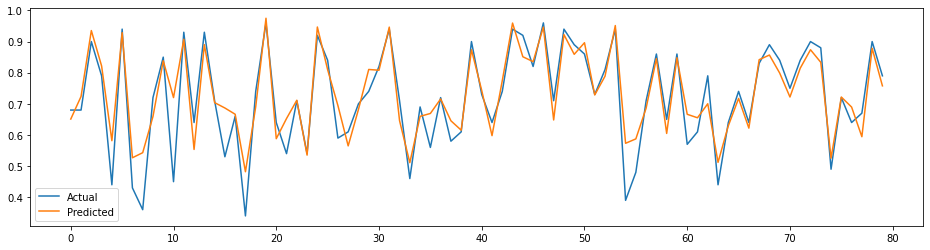

In [25]:
compare = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted':y_pred})

compare.plot(kind='line', figsize=(16, 4))

In [26]:
mse  = metrics.mean_squared_error(y_test, y_pred)
mae  = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2   = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score (R2): {r2}')

Mean Squared Error (MSE): 0.004617003377285011
Mean Absolute Error (MAE): 0.04795673362091198
Root Mean Squared Error (RMSE): 0.06794853476922819
R2 Score (R2): 0.8212082591486991


In [ ]:
konsep pemahamannya?

rata2/jumlah dari tiap perubahan garis






# Polynomial Regression

In [ ]:
data 
# x y

# jadi ada x2, x3, x4, ... x9
# x y x2 x3 x4 ... x9
for i in range(2, 10):
    df1[f'x{i}'] = df1['x'] ** i

df1.head()

# jadi ada y_poly
# x y x2 x3 x4 ... x9 y_poly
model_poly = LinearRegression()
model_poly.fit(df1[['x', 'x2']], df1['y'])

df1['y_poly'] = model_poly.predict(df1[['x', 'x2']])
df1.head()

# jadi ada y_poly2, y_poly_3, ... y_poly5
model_poly = LinearRegression()

xn = ['x']
for i in range(2, 6):
    xn.append(f'x{i}')
    model_poly.fit(df1[xn], df1['y']) # fitting model
    df1[f'y_Poly{i}'] = model_poly.predict(df1[xn]) #prediksi
    
df1['y_Poly2']

# visualisasi
plt.plot(df1['x'], df1['y'], 'k.')
plt.plot(df1['x'], df1['y_Poly2'], 'm-')
plt.plot(df1['x'], df1['y_Poly3'], 'b-')
plt.plot(df1['x'], df1['y_Poly4'], 'r-')
plt.plot(df1['x'], df1['y_Poly5'], 'g-')
plt.legend(['Data', 'Pangkat2', 'Pangkat3', 'Pangkat4', 'Pangkat5'])
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.show()

print('RMSE y_Poly2: ', np.sqrt(mse(df1['y'], df1['y_Poly2'])))
print('RMSE y_Poly3: ', np.sqrt(mse(df1['y'], df1['y_Poly3'])))
print('RMSE y_Poly4: ', np.sqrt(mse(df1['y'], df1['y_Poly4'])))
print('RMSE y_Poly5: ', np.sqrt(mse(df1['y'], df1['y_Poly5'])))

In [ ]:
konsep pemahamannya

ditumpuk
tiap pangkat, itu beda garis
diliat yg paling tepatprediksinya siapa



In [ ]:
Parameters
    fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

    normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

    copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

    n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

    positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

New in version 0.24.